          Date  Price1  Price2  Price3  Price4  Price5
0       date-3     676     676     676     681     681
1       Date-2     705     755     755     755     755
2       Date-1     636     636     676     686     686
3  Travel_Date     638     755     755     755     755
4       Date+1     638     638     746     746     755
5       Date+2     568     638     638     638     648
6       Date+3     746     746     755     755     755
Average Price per Day, $
 0    678.0
1    745.0
2    664.0
3    731.6
4    704.6
5    626.0
6    751.4
dtype: float64
Lowest Price of the Week is $
 0    676
1    705
2    636
3    638
4    638
5    568
6    746
dtype: int64
          0    1    2    3    4    5    6
Price1  676  705  636  638  638  568  746
Price2  676  755  636  755  638  638  746
Price3  676  755  676  755  746  638  755
Price4  681  755  686  755  746  638  755
Price5  681  755  686  755  755  648  755


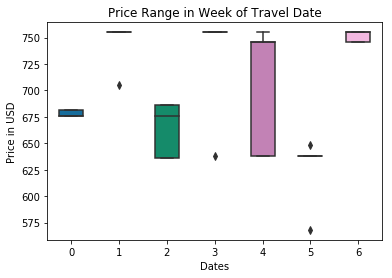

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials f18sm8656628qkl.55 - gsmtp')

In [3]:
import csv
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from smtplib import SMTP
import sys


df= pd.read_csv('Flight_Data.csv', names = ["Date", "Airline", "Duration", "Price1", "Price2","Price3","Price4","Price5","Departure", "Arrival", "Stops", "Layover"])

df1 = df[["Price1","Price2","Price3","Price4","Price5"]]

idx = 0
new_col = ['date-3','Date-2','Date-1','Travel_Date','Date+1','Date+2','Date+3']
df1.insert(loc=idx, column='Date', value=new_col)

print (df1)

print("="*50)

Average = df1.mean(axis=1)
print('Average Price per Day, $\n',Average)

print("="*50)

Lowest_Price = df1.min(axis=1)
print('Lowest Price of the Week is $\n', Lowest_Price)
 

print("="*50)

df2 = df[["Price1","Price2","Price3","Price4","Price5"]]

tdf = df2.T

print(tdf)

bplot=sns.boxplot(data=tdf, width=0.5, palette="colorblind")
bplot.axes.set_title("Price Range in Week of Travel Date", fontsize=12)
 
bplot.set_xlabel("Dates", fontsize=10)
 
bplot.set_ylabel("Price in USD",fontsize=10)

plt.show()

print("="*50)

#=====================================================================
# Sending e-mail alert regards flight prices
    
username = 'Domain@gmail.com'
password = 'Password'

server = smtplib.SMTP('smtp.gmail.com', 587)
server.ehlo()
server.starttls()
server.login(username, password)
    
message = MIMEMultipart()
    
message['From'] = 'from@domain.com'
message['to'] = 'ToEmail@domain.com'
    
msg = ('Subject: Flight Data\n\n\The Cheapest Flight of the week is %s' %Lowest_Price)
    
server.sendmail(msg['From'], message['to'], msg.as_string())